In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('/content/API_IDN_DS2_en_excel_v2_2199.xls', sheet_name=0, skiprows=3)

In [4]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Indonesia,IDN,"Intentional homicides (per 100,000 people)",VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Indonesia,IDN,"Internally displaced persons, new displacement...",VC.IDP.NWDS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.430000e+05,2.040000e+05,1.204000e+06,3.750000e+05,8.530000e+05,4.630000e+05,7.050000e+05,7.490000e+05,3.080000e+05,238000.0
2,Indonesia,IDN,"Voice and Accountability: Percentile Rank, Upp...",VA.PER.RNK.UPPER,NaN,NaN,NaN,NaN,NaN,NaN,...,5.911330e+01,5.862069e+01,5.763547e+01,5.714286e+01,5.922330e+01,5.748792e+01,5.700483e+01,5.797102e+01,5.845411e+01,NaN
3,Indonesia,IDN,Voice and Accountability: Estimate,VA.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,1.539217e-01,1.848712e-01,1.679689e-01,1.316251e-01,1.622369e-01,1.312883e-01,9.913336e-02,1.496079e-01,1.415187e-01,NaN
4,Indonesia,IDN,High-technology exports (current US$),TX.VAL.TECH.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.585888e+09,5.889537e+09,5.415602e+09,5.971476e+09,6.382015e+09,6.281267e+09,6.408688e+09,7.492073e+09,9.894860e+09,NaN


In [5]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [6]:
# Change from wide to long
df_tidy = df.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name = 'Year',
                    value_name = 'cases')
df_tidy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,cases
0,Indonesia,IDN,"Intentional homicides (per 100,000 people)",VC.IHR.PSRC.P5,1960,NaN
1,Indonesia,IDN,"Internally displaced persons, new displacement...",VC.IDP.NWDS,1960,NaN
2,Indonesia,IDN,"Voice and Accountability: Percentile Rank, Upp...",VA.PER.RNK.UPPER,1960,NaN
3,Indonesia,IDN,Voice and Accountability: Estimate,VA.EST,1960,NaN
4,Indonesia,IDN,High-technology exports (current US$),TX.VAL.TECH.CD,1960,NaN


In [7]:
# Get rid of missing values
df_tidy.isna().sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
Year,0
cases,50086


In [8]:
df_tidy.dropna(subset=['cases'], inplace=True)
df_tidy.isna().sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
Year,0
cases,0


In [9]:
# use pivot table to turn all indicators into column (so it is easier to search value for)
df.drop('Indicator Code', axis='columns', inplace=True)
df_tidy_pivot = df_tidy.pivot_table(index = ['Country Name', 'Country Code', 'Year'],
                                    columns = 'Indicator Name',
                                    values = 'cases')
df_tidy_pivot = df_tidy_pivot.reset_index()
df_tidy_pivot.columns.name = None
df_tidy_pivot.head()

,Country Name,Country Code,Year,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,Indonesia,IDN,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Indonesia,IDN,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Indonesia,IDN,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Indonesia,IDN,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Indonesia,IDN,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Save tidy table as csv
df_tidy_pivot.to_csv('/content/TidyIndoWorldBank.csv')

In [12]:
# Obtaining population data
df_population = pd.read_csv("/content/TidyIndoWorldBank.csv")
df_population.columns.tolist()

['Unnamed: 0',
 'Country Name',
 'Country Code',
 'Year',
 'ARI treatment (% of children under 5 taken to a health provider)',
 'Access to clean fuels and technologies for cooking (% of population)',
 'Access to clean fuels and technologies for cooking, rural (% of rural population)',
 'Access to clean fuels and technologies for cooking, urban (% of urban population)',
 'Access to electricity (% of population)',
 'Access to electricity, rural (% of rural population)',
 'Access to electricity, urban (% of urban population)',
 'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)',
 'Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of p

In [13]:
# Counting the number of columns
print(len(df_population.columns))

1429


In [14]:
columns_to_keep = ['Country Name', 'Country Code', 'Year',
                   'Population ages 0-14 (% of total population)', 'Population ages 0-14, total',
                   'Population ages 15-64 (% of total population)', 'Population ages 15-64, total',
                   'Population ages 65 and above (% of total population)', 'Population ages 65 and above, total',
                   'Total greenhouse gas emissions (kt of CO2 equivalent)']

In [15]:
df_population_mf = df_population[columns_to_keep]
df_population_mf.head()

,Country Name,Country Code,Year,Population ages 0-14 (% of total population),"Population ages 0-14, total",Population ages 15-64 (% of total population),"Population ages 15-64, total",Population ages 65 and above (% of total population),"Population ages 65 and above, total",Total greenhouse gas emissions (kt of CO2 equivalent)
0,Indonesia,IDN,1960,39.748242,35130642.0,57.805948,51090563.0,2.445810,2161677.0,NaN
1,Indonesia,IDN,1961,40.015868,36341186.0,57.468987,52191574.0,2.515145,2284178.0,NaN
2,Indonesia,IDN,1962,40.330422,37646629.0,57.087063,53288198.0,2.582516,2410662.0,NaN
3,Indonesia,IDN,1963,40.689845,39047004.0,56.662709,54374968.0,2.647445,2540556.0,NaN
4,Indonesia,IDN,1964,41.064370,40520292.0,56.223815,55478883.0,2.711815,2675886.0,NaN


In [16]:
df_population_mf

,Country Name,Country Code,Year,Population ages 0-14 (% of total population),"Population ages 0-14, total",Population ages 15-64 (% of total population),"Population ages 15-64, total",Population ages 65 and above (% of total population),"Population ages 65 and above, total",Total greenhouse gas emissions (kt of CO2 equivalent)
0,Indonesia,IDN,1960,39.748242,35130642.0,57.805948,51090563.0,2.445810,2161677.0,NaN
1,Indonesia,IDN,1961,40.015868,36341186.0,57.468987,52191574.0,2.515145,2284178.0,NaN
2,Indonesia,IDN,1962,40.330422,37646629.0,57.087063,53288198.0,2.582516,2410662.0,NaN
3,Indonesia,IDN,1963,40.689845,39047004.0,56.662709,54374968.0,2.647445,2540556.0,NaN
4,Indonesia,IDN,1964,41.064370,40520292.0,56.223815,55478883.0,2.711815,2675886.0,NaN
...,...,...,...,...,...,...,...,...,...,...
59,Indonesia,IDN,2019,25.962466,69990363.0,67.443716,181816710.0,6.593818,17775805.0,1.020914e+06
60,Indonesia,IDN,2020,25.718936,69918977.0,67.571545,183698630.0,6.709519,18240362.0,9.764877e+05
61,Indonesia,IDN,2021,25.476486,69742692.0,67.743883,185451041.0,6.779631,18559457.0,NaN
62,Indonesia,IDN,2022,25.206486,69444207.0,67.936349,187165550.0,6.857165,18891582.0,NaN


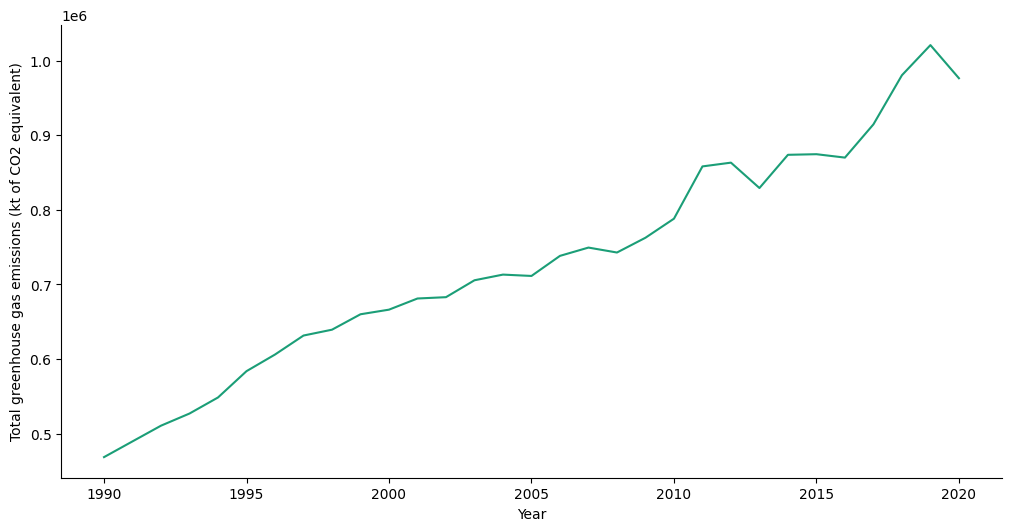

In [17]:
# @title Year vs Total greenhouse gas emissions (kt of CO2 equivalent)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Total greenhouse gas emissions (kt of CO2 equivalent)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_population_mf.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Total greenhouse gas emissions (kt of CO2 equivalent)')